In [1]:
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
g = 9.8
v_t = 4.9
C_D = 1/5
C_L = 1

#v0 = 6
#theta0 = 50/180*3.1415927
x0 = 0
y0 = 2

In [3]:
def f(u):
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                      -g*cos(theta)/v + g/v_t**2*v,
                      v*cos(theta),
                      v*sin(theta)])

In [4]:
def euler_step(u, f, dt):
    return u + dt * f(u)

In [6]:
T = 10
dt = 0.0005
N = int(T/dt) + 1
t = numpy.linspace(0, T, N)
xmax = 0
thetamax = 0
vi = 0


for v0 in numpy.linspace(7,9,5):
    
    for theta0 in range (-20,40,):
        u = numpy.empty((N, 4))
        theta0 = theta0/180*numpy.pi
        u[0] = numpy.array([v0, theta0, x0, y0])
        for n in range(N-1):
            u[n+1] = euler_step(u[n], f, dt)
            if u[n+1, 3] < 0:
                if xmax<u[n,2]:
                    xmax = u[n,2]
                    thetamax = theta0
                    vi = v0
                #print (u[n,2],u[n,3],u[n+1,3])
                break

               
        
            
print (vi,xmax,thetamax/numpy.pi*180)

8.5 78.5676722811 38.00000000000001


In [21]:
T = 20
dt = 0.001
N = int(T/dt) + 1
t = numpy.linspace(0, T, N)
xmax = 0
thetamax = 0
u = numpy.empty((N, 4))

 
for theta0 in range (-90,91,):

    theta0 = theta0/180*numpy.pi
    u[0] = numpy.array([v0, theta0, x0, y0])
    for n in range(N-1):
        u[n+1] = euler_step(u[n], f, dt)

    x = u[:,2]
    y = u[:,3]

    yground = numpy.where(y<0)[0]
    if len(yground)==0:
        print ('not ground')
    else:
        ground = yground[0]
    if x[ground]>xmax:
        xmax = x[ground]
        thetamax = theta0
        print(xmax, thetamax/numpy.pi*180)
    else:
        print(theta0/numpy.pi*180)

    

0.830485040423 -90.0
0.867784561977 -89.0
0.905102891044 -88.0
0.947814601946 -87.0
0.985187974648 -86.0
1.0280687367 -85.0
1.07103816444 -84.0
1.11407003883 -83.0
1.16291824219 -82.0
1.20606452448 -81.0
1.25511500159 -80.0
1.30425300226 -79.0
1.35951333563 -78.00000000000001
1.40878014457 -77.0
1.46422367866 -76.00000000000001
1.5259968804 -75.0
1.58156351177 -74.0
1.64347727854 -73.0
1.71185543694 -72.0
1.78028816261 -71.0
1.85525961879 -70.0
1.93022083679 -69.0
2.01173165409 -68.0
2.09981093289 -67.0
2.20117862105 -66.0
2.30234185953 -65.0
2.42347380512 -64.0
2.55090262465 -62.99999999999999
2.70476074761 -62.0
2.88457249732 -60.99999999999999
3.1231202899 -60.0
3.54323085775 -58.99999999999999
9.642153716 -58.00000000000001
9.68821791087 -57.0
9.73425545688 -56.0
9.77610182441 -55.00000000000001
9.82203088295 -54.0
9.86791388381 -53.0
9.90947285245 -51.99999999999999
9.95520035775 -51.0
10.0008539088 -50.0
10.0420440705 -48.99999999999999
10.087478711 -48.0
10.1283551464 -47.0
10.1

In [18]:
numpy.pi

3.141592653589793

In [16]:
for p in range(10):
    if p > 6:
        break
    print(p)

0
1
2
3
4
5
6


In [27]:
for p in numpy.linspace(-1,1,21):
    print(p)

-1.0
-0.9
-0.8
-0.7
-0.6
-0.5
-0.4
-0.3
-0.2
-0.1
0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


In [14]:
theta = 50/180*3.1415927
-g*sin(theta) - C_D/C_L*g/v_t**2*v**2

NameError: name 'v' is not defined

In [6]:
print(theta0)

1.0471975666666666


In [6]:
x = u[:,2]
y = u[:,3]

In [7]:
yy = numpy.where(y<0)[0]
if len(yy)==0:
    print ('not ground')
else:
    ground = yy[0]
    

4.96632202333


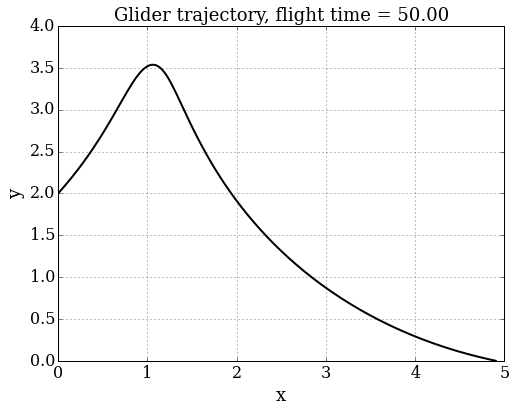

In [7]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Glider trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x[:ground],y[:ground], 'k-', lw=2);
print (x[ground])

In [11]:
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001])

u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N = int(T/dt) + 1
    t = numpy.linspace(0, T, N)
    
    u = numpy.empty((N, 4))
    u[0] = numpy.array([v0, theta0, x0, y0])
    
    for n in range(N-1):
       
        u[n+1] = euler_step(u[n], f, dt)
        
    u_values[i] = u

In [12]:
def get_diffgrid(u_current, u_fine, dt):
    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
   
    grid_size_ratio = ceil(N_fine/N_current)
    
    diffgrid = dt * numpy.sum( numpy.abs(\
            u_current[:,2]- u_fine[::grid_size_ratio,2])) 
    
    return diffgrid

In [13]:
diffgrid = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    print('dt = {}'.format(dt))
    
    diffgrid[i] = get_diffgrid(u_values[i], u_values[-1], dt)

dt = 0.1
dt = 0.05
dt = 0.01
dt = 0.005
dt = 0.001


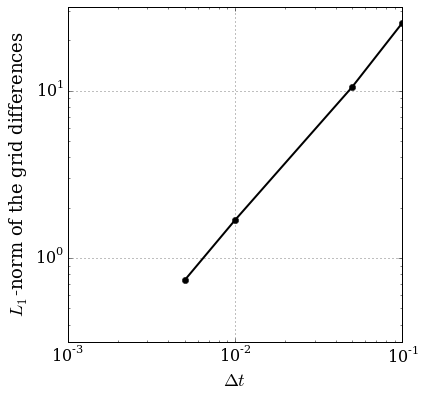

In [14]:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=18)
pyplot.ylabel('$L_1$-norm of the grid differences', fontsize=18)
pyplot.axis('equal')
pyplot.loglog(dt_values[:-1], diffgrid[:-1], color='k', ls='-', lw=2, marker='o');

In [42]:
range(0, 1[, 0.1])

SyntaxError: invalid syntax (<ipython-input-42-fa54ebfb7156>, line 1)

In [12]:
?range

In [21]:
for th in range (3,6, 0.2):
    print (th)

TypeError: 'float' object cannot be interpreted as an integer

In [18]:
range(0, 4, 0.1)

TypeError: 'float' object cannot be interpreted as an integer

In [48]:
u = [[2,3],[4,5]]

In [49]:
u

[[2, 3], [4, 5]]

In [50]:
u[1,1]

TypeError: list indices must be integers, not tuple